In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Import Data

In [3]:
train_data = pd.read_csv('TitanicData/train.csv')
test_data = pd.read_csv('TitanicData/test.csv')

data_set = [train_data, test_data]
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Feature Engineering

In [4]:
for data in data_set:
    data['TicketType'] = data['Ticket'].apply(lambda x: x[0:3])
    data['TicketType'] = data['TicketType'].astype('category')
    data['TicketType'] = data['TicketType'].cat.codes


train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,124
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,137
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,148
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,97


In [5]:
for data in data_set:
    age_mean = train_data['Age'].mean()
    age_std = train_data['Age'].std()
    is_null = data['Age'].isnull().sum()
    rand_age = np.random.randint(age_mean - age_std, age_mean + age_std, size=is_null)

    age_slice = data["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    data["Age"] = age_slice
    data["Age"] = data["Age"].astype(int)

train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketType
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,124
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,137
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,148
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,97


In [6]:
for data in data_set:
    data['HasCabin'] = data['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketType,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,124,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,137,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,148,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,97,0


In [7]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    return 'None'

def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

title_list = ['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

for data in data_set:
    data['Title'] = data['Name'].map(lambda x: substrings_in_string(x, title_list))
    data['Title'] = data.apply(replace_titles, axis=1)
    data['Title'] = data['Title'].astype('category')

train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketType,HasCabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,124,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,137,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,148,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,97,0,Mr


In [8]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
for data in data_set:
    data['Deck'] = data['Cabin'].map(lambda x: substrings_in_string(str(x), cabin_list))
    data['Deck'] = data['Deck'].astype('category')

train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketType,HasCabin,Title,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,124,0,Mr,None
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,137,1,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,148,0,Miss,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3,1,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,97,0,Mr,None


In [9]:
for data in data_set:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketType,HasCabin,Title,Deck,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,124,0,Mr,None,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,137,1,Mrs,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,148,0,Miss,None,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3,1,Mrs,C,2
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,97,0,Mr,None,1


In [10]:
for data in data_set:
    data['Fare'] = data['Fare'].fillna(0)
    data['Fare/Person'] = data['Fare']/data['FamilySize']

train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketType,HasCabin,Title,Deck,FamilySize,Fare/Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,124,0,Mr,None,2,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,137,1,Mrs,C,2,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,148,0,Miss,None,1,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3,1,Mrs,C,2,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,97,0,Mr,None,1,8.05000


# Model Exploration


In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
drop_elements = ['PassengerId', 'Name', 'Cabin', 'Ticket']
X_train = train_data.drop(drop_elements, axis=1)
X_train = X_train.drop(['Survived'], axis=1)
X_test = test_data.drop(drop_elements, axis=1)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
Y_train = train_data['Survived']

X_test['Deck_T'] = 0
print(X_test.info())
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Age           418 non-null    int32  
 2   SibSp         418 non-null    int64  
 3   Parch         418 non-null    int64  
 4   Fare          418 non-null    float64
 5   TicketType    418 non-null    int8   
 6   HasCabin      418 non-null    int64  
 7   FamilySize    418 non-null    int64  
 8   Fare/Person   418 non-null    float64
 9   Sex_female    418 non-null    uint8  
 10  Sex_male      418 non-null    uint8  
 11  Embarked_C    418 non-null    uint8  
 12  Embarked_Q    418 non-null    uint8  
 13  Embarked_S    418 non-null    uint8  
 14  Title_Master  418 non-null    uint8  
 15  Title_Miss    418 non-null    uint8  
 16  Title_Mr      418 non-null    uint8  
 17  Title_Mrs     418 non-null    uint8  
 18  Deck_A        418 non-null    

In [12]:
rf.fit(X_train, Y_train)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring="accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.82222222 0.86516854 0.76404494 0.84269663 0.85393258 0.86516854
 0.80898876 0.78651685 0.84269663 0.83146067]
Mean: 0.8282896379525593
Standard Deviation: 0.031756147704024455


<AxesSubplot:xlabel='feature'>

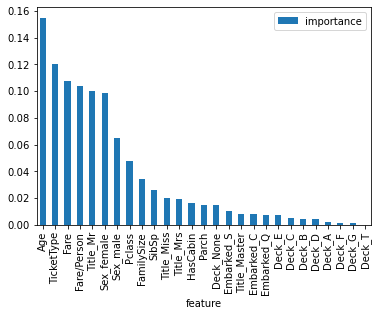

In [13]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

In [14]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(200, 2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num=10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [15]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, Y_train)

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.9min finished


{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [16]:
best_grid = rf_random.best_estimator_
scores = cross_val_score(best_grid, X_train, Y_train, cv=10, scoring="accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.81111111 0.83146067 0.73033708 0.83146067 0.87640449 0.85393258
 0.83146067 0.7752809  0.85393258 0.85393258]
Mean: 0.8249313358302123
Standard Deviation: 0.04111549349522226


In [39]:
Y_test = best_grid.predict(X_test)

output = test_data[['PassengerId']]
output = output.assign(Survived=Y_test)
output = output.set_index('PassengerId')
output

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0
